In [1]:
#import the library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings('ignore')


In [2]:
#read data
df = pd.read_csv("../../MBB.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,10696.2,10273.2,10696.2,10212.7,19.00M,4.53%
1,1/3/2018,10595.5,10716.3,10817.0,10555.2,18.30M,-0.94%
2,1/4/2018,10615.6,10655.9,10696.2,10535.0,15.69M,0.19%
3,1/5/2018,10535.0,10635.7,10655.9,10454.5,23.65M,-0.76%
4,1/8/2018,11058.8,10514.9,11058.8,10494.7,22.19M,4.97%
...,...,...,...,...,...,...,...
1487,12/15/2023,18050.0,18050.0,18200.0,18000.0,5.54M,0.00%
1488,12/18/2023,18000.0,18050.0,18150.0,17950.0,5.28M,-0.28%
1489,12/19/2023,18150.0,18000.0,18200.0,17950.0,5.90M,0.83%
1490,12/20/2023,18150.0,18150.0,18200.0,18050.0,3.09M,0.00%


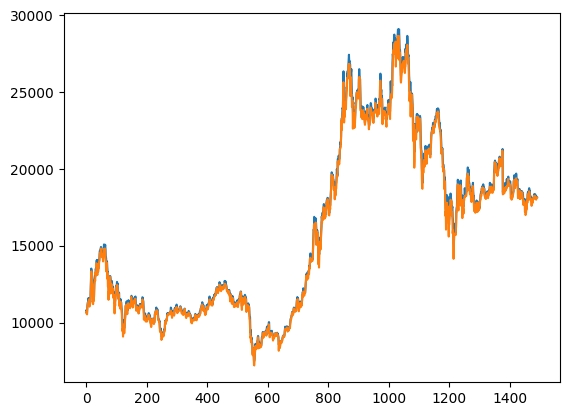

In [3]:
#Choose the independent, dependent variables
y = df[["Price"]] # predictor 
X= df[["High"]] #independent variable
plt.plot(X)
plt.plot(y)
plt.show()

In [4]:
# Split the data into training, testing sets by 8:2
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [5]:
# params = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'loss': ['linear', 'square', 'exponential'],
#     'estimator': [None, DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)],
#     'random_state': [42],
# }

# # Create an AdaBoostRegressor instance
# abr = AdaBoostRegressor()

# # Create a GridSearchCV instance
# model = GridSearchCV(
#     estimator=abr,
#     param_grid=params,
#     scoring='neg_mean_squared_error',
#     verbose=1
# )

# # Fit the model
# model.fit(X_train, y_train)

# # Print the best parameters and lowest RMSE
# print("Best parameters:", model.best_params_)
# print("Lowest RMSE:", (-model.best_score_) ** 0.5)


In [6]:
#Create model with hyperparameter
model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=200,
    learning_rate=0.2,
    loss='square',
    random_state=42
)

# Fit the model to the training data
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.2, loss='square', n_estimators=200,
                  random_state=42)

In [7]:
#make predictions for test data
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [8]:
#calculate some metrics
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
msle = mean_squared_log_error(y_test, y_pred)
print("MAPE:", mape)
print("MAE: ",  mae)
print("RMSE:", rmse)
print("MSLE: ", msle)

MAPE: 1.2987839712890645
MAE:  243.2484852084861
RMSE: 280.83874444547104
MSLE:  0.00022795127815140482


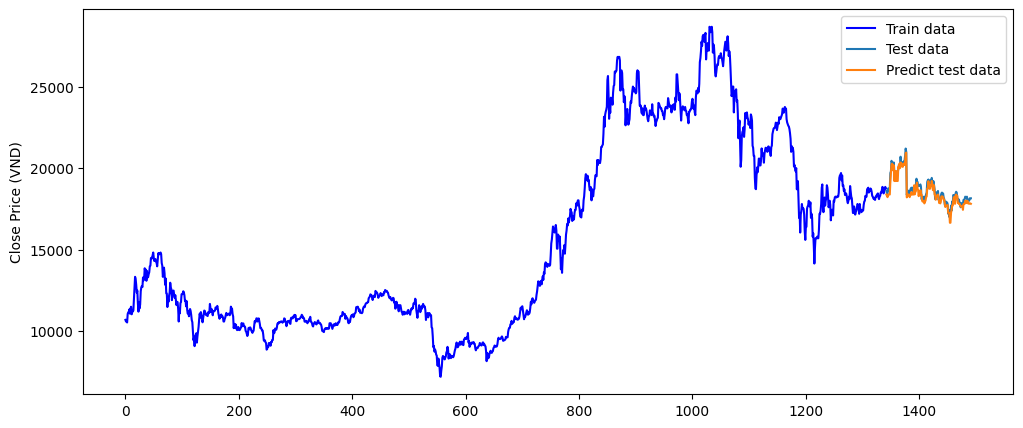

In [9]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

In [10]:
#Take the last data from the test
last_row = df.tail(1)
last_data = (last_row['High']).values.reshape(-1,1)
last_data

array([[18150.]])

In [11]:
#Make prediction for next 30 days
x_next_30_day = []

for i in range(30):
    x_pred_next = model.predict(last_data)
    x_next_30_day.append(x_pred_next)
    last_data = (x_pred_next).reshape(-1,1)

print("Ket qua du doan XGBoost ", x_next_30_day)


Ket qua du doan XGBoost  [array([17813.17]), array([17294.52608696]), array([16650.]), array([16075.]), array([15516.85]), array([15048.78947368]), array([14618.01666667]), array([14198.52068966]), array([13803.4]), array([13488.10833333]), array([13058.425]), array([12811.98823529]), array([12571.33333333]), array([12234.81641791]), array([11972.21538462]), array([11754.87142857]), array([11550.55]), array([11324.96756757]), array([11061.67596899]), array([10980.55945946]), array([10839.975]), array([10679.15]), array([10560.00310078]), array([10474.08571429]), array([10399.4]), array([10211.5]), array([10065.09454545]), array([9892.5]), array([9679.8]), array([9478.00434783])]


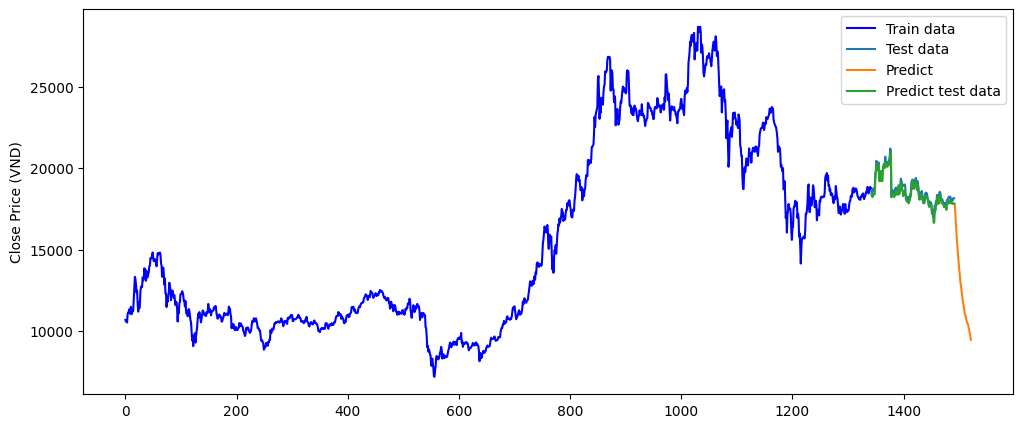

In [13]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(range(len(df), len(df)+30),x_next_30_day, label='Predict')
plt.plot(X_test.index, y_pred, label='Predict test data')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.show()

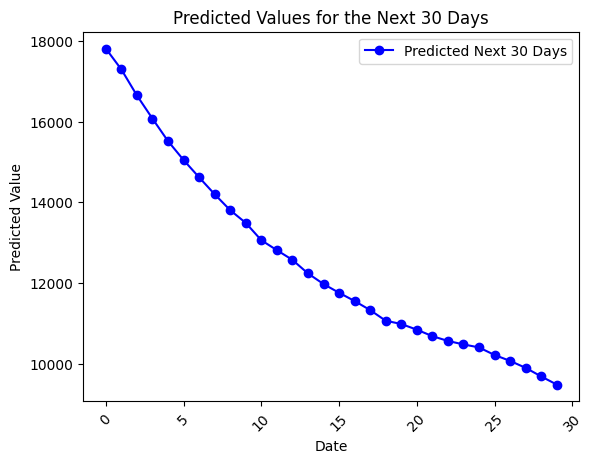

In [14]:
# Vẽ biểu đồ

plt.plot(x_next_30_day, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()